# Value Iteration & Policy Iteration

On va utiliser l'exemple du monde grille simple. 

![Grid World](https://www.lamsade.dauphine.fr/~airiau/Teaching/M2-IASDapp-RL/gridworld.png)



On va numéroter les états comme suit:

| 7 | 8 | 9 | 10 |
|---|---|----|---|
| **4** |  - | **5** | **6**  |
| **0** | **1** | **2** | **3**  |

Les états finaux sont donc les états 6 et 10.

On a 4 actions disponibles, on les encode de la façon suivante:
* $\uparrow$: 0 
* $\leftarrow$ : 1
* $\downarrow$: 2
* $\rightarrow$ : 3

Ci-dessous, on a entré pour vous la matrice de transition $T$ et la matrice de récompense $R$. Ainsi $T[s_1,a,s_2]$ donne la probabilité d'atteindre l'état $s_2$ en ayant pris l'action $a$ dans l'état $s_1$ et $R[s,a]$ donne la récompense immédiate reçue après avoir pris l'action $a$ dans l'état $s$.

Vous pouvez facilement changer la pénalité pour avancer d'une case en changeant la valeur de la variable `penalty` ci-dessous.

Ce n'est peut-être pas la manière la plus élégante, mais cela suffira pour l'exercice !

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
l = 0.8
s = 0.1
v_win = 1
v_lose = -1

# Transition Matrix
T = np.zeros((11, 4, 11))

# UP
T[0,0,:]=[s, s, 0, 0, l, 0, 0, 0, 0, 0, 0 ] 
T[1,0,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,0,:]=[0, s, 0, s, 0, l, 0, 0, 0, 0, 0 ]
T[3,0,:]=[0, 0, s, s, 0, 0, l, 0, 0, 0, 0 ]
T[4,0,:]=[0, 0, 0, 0, 2*s, 0, 0, l, 0, 0, 0 ]
T[5,0,:]=[0, 0, 0, 0, 0, s, s, 0, 0, l, 0 ]
T[6,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,0,:]=[0, 0, 0, 0, 0, 0, 0, s+l, s, 0, 0 ]
T[8,0,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]

# LEFT
T[0,1,:]=[s+l, 0, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,1,:]=[l, 2*s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,1,:]=[0, l, s, 0, 0, s, 0, 0, 0, 0, 0 ]
T[3,1,:]=[0, 0, l, s, 0, 0, s, 0, 0, 0, 0 ]
T[4,1,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,1,:]=[0, 0, s, 0, 0, l, 0, 0, 0, s, 0 ]
T[6,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,1,:]=[0, 0, 0, 0, s, 0, 0, s+l, 0, 0, 0 ]
T[8,1,:]=[0, 0, 0, 0, 0, 0, 0, l, 2*s, 0, 0 ]
T[9,1,:]=[0, 0, 0, 0, 0, s, 0, 0, l, s, 0 ]
T[10,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]

# DOWN
T[0,2,:]=[s+l, s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ] 
T[1,2,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,2,:]=[0, s, l, s, 0, 0, 0, 0, 0, 0, 0 ]
T[3,2,:]=[0, 0, s, l+s, 0, 0, 0, 0, 0, 0, 0 ]
T[4,2,:]=[l, 0, 0, 0, 2*s, 0, 0, 0, 0, 0, 0 ]
T[5,2,:]=[0, 0, l, 0, 0, s, s, 0, 0, 0, 0 ]
T[6,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,2,:]=[0, 0, 0, 0, l, 0, 0, s, s, 0, 0 ]
T[8,2,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]

# RIGHT
T[0,3,:]=[s, l, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,3,:]=[0, 2*s, l, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,3,:]=[0, 0, s, l, 0, s, 0, 0, 0, 0, 0 ]
T[3,3,:]=[0, 0, 0, s+l, 0, 0, s, 0, 0, 0, 0 ]
T[4,3,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,3,:]=[0, 0, s, 0, 0, 0, l, 0, 0, s, 0 ]
T[6,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,3,:]=[0, 0, 0, 0, s, 0, 0, s, l, 0, 0 ]
T[8,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 2*s, l, 0 ]
T[9,3,:]=[0, 0, 0, 0, 0, s, 0, 0, 0, s, l ]
T[10,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]


# Reward matrix
penalty = 0.00
R = penalty * np.ones((11,4))
R[10,:] = np.ones(4) * v_win
R[6,:] = np.ones(4) * v_lose

## Helper functions
The class `RandomAgent` implements an agent with a policy $\pi(a|s)$. The method `act` will take the state $s$ as input, and then sample an action according to the probabilities $\pi(s|a)$. 

To implement this we use a table `probs` of size $|\mathcal{S}| \times |\mathcal{A}|$. So `probs[s][a]` $= \pi(a|s)$. Here we implement an agent that (initially) chooses the action with a uniform probability, so all actions are equally likely in each state.

In [21]:
class RandomAgent():
    
    def __init__(self, n_actions=4, n_states=11):
        self.n_actions = n_actions # Number of actions
        self.n_states = n_states # Number of states
        
        # Uniform probabilites in each state.
        # That is, in each of the nS states
        # each of the nA actions has probability
        # 1/nA.
        self.probs = np.ones((n_states, n_actions))/n_actions 

    def act(self, state, done):
        action = np.random.choice(self.nA, p=self.probs[state]) 
        return action # a random policy

In [22]:
class Environment():
    
    def __init__(self, observation_space, action_space, transition_matrix, reward_matrix):
        self.observation_space = observation_space
        self.action_space = action_space
        self.n_states = len(observation_space) # Number of actions
        self.n_actions = len(action_space) # Number of spaces
        self.T = transition_matrix 
        self.R = reward_matrix

In [23]:
observation_space = list(range(11))
action_space = list(range(4))

In [24]:
agent = RandomAgent()
env = Environment(observation_space, action_space, T, R)

## Value Iteration
Implémentez l'algorithme d'itération sur les valeurs. Pour ce faire, implémentez une fonction qui prend en paramètre:
* $\epsilon$ le paramètre pour le test d'arrêt (dans un premier temps, vous pouvez remplacer ce paramètre par un nombre d'itérations maximal, comme dans l'appel ci-dessou)
* $\gamma$ le taux d'escompte (i.e. la valeur à l'instant t d'obtenir une unité de récompense à l'instant t+1)
* $T$ la matrice de transition
* $R$ la matrice de récompense

La méthode retourne le vecteur $v: S \rightarrow {\mathbb R}$ qui associe à chaque état la valeur optimale de cet état.

La fonction $printV$ ci-dessous affichera les valeurs de $v$ pour le problème du gridworld.

Vous pourrez ainsi tester si vous retrouvez les valeurs de l'exemple montré en cours. 

In [25]:
def compute_action_value(env, discount, s, a, v):
    """Compute q_pi(s,a) given v_pi(s)"""
    action_value = env.R[s,a] + discount * sum([env.T[s,a,next_s]*v[next_s] for next_s in range(env.n_states)])
    return action_value

def Bellman_RHS(env, discount, agent, s, v):
    """Compute the right-hand side of the Bellman equation"""
    state_value = 0
    for a in range(env.n_actions):
        state_value += agent.probs[s,a] * compute_action_value(env, discount, s, a, v)
    return state_value

def Bellman_RHS_all(env, discount, agent, v0):
    """Given a value function, computes the right-hand side 
    of the Bellman equation for all states"""
    # v0 is the given value function
    # v will be the right-hand side of the Bellman equation
    # If v0 is indeed the value function, then we should get v = v0.
    
    v = np.zeros(env.n_states)
    
    for s in range(env.n_states):
        v[s] = Bellman_RHS(env, discount, agent, s, v0)
    
    return v

In [26]:
def value_iteration(env, discount, agent, Niter=100, epsilon=1e-2):
    
    v = np.zeros(env.n_states)
    
    for i in range(Niter): # Loop
        delta = 0
        for s in range(env.n_states):
            vs = v[s]
            
            # Code for updating v[s]
            action_values = np.zeros(env.n_actions)
            for a in range(env.n_actions):
                # Compute action value for all actions
                action_values[a] = compute_action_value(env, discount, s, a, v)
            
            v[s] = np.max(action_values)
            
            delta = np.max([delta, np.abs(vs-v[s])])
        if (delta < epsilon): # Until delta < tol
            break
            
    return v    

In [27]:
def printV(v):
    print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[7], v[8], v[9], v[10]))
    print('| {:03.2f} | ---- | {:03.2f} | {:03.1f} |'.format(v[4], v[5], v[6]))
    print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[0], v[1], v[2], v[3]))

In [28]:
#w = valueIteration(100, 0.9, T, R)
#printV(w)

v = value_iteration(env, discount=0.9, agent=agent, Niter=100)
printV(v)

| 0.64 | 0.74 | 0.85 | 1.00 |
| 0.57 | ---- | 0.57 | -1.0 |
| 0.49 | 0.43 | 0.48 | 0.28 |


In [29]:
# plot the best policy given the value function v:
# i.e. plot the best action for each state given the value function v.

def plotBestPolicy(v, gamma):
  bestV=np.zeros(11)
  bestA=np.zeros(11)
  fig, ax = plt.subplots()
  # policy extraction
  for s1 in range(11):
    val=[]
    for a in range(4):
      va=0
      for s2 in range(11):
        va += T[s1,a,s2]*v[s2]
      val= val+[ R[s1,a]+gamma*va ]
    bestV[s1]=np.max(val)
    bestA[s1]=np.argmax(val)

    matV= np.array( [[bestV[7], bestV[8], bestV[9], bestV[10]],
                    [bestV[4],   -1 , bestV[5], bestV[6]],
                    [bestV[0], bestV[1], bestV[2], bestV[3]]]
                    )
    matA = np.array([
                    [bestA[7], bestA[8], bestA[9], -1],
                    [bestA[4],   -1 , bestA[5], -1],
                    [bestA[0], bestA[1], bestA[2], bestA[3]]])

    im = ax.imshow(matV)


  for i in range(matV.shape[0]):
      for j in range(matV.shape[1]):
          if matA[i][j]==-1:
              arrow = ''
          elif matA[i, j] == 0:
              arrow = '^'
          elif matA[i, j] == 1:
              arrow = '<'
          elif matA[i, j] == 2:
              arrow = 'v'
          elif matA[i, j] == 3:
              arrow = '>'
          text = ax.text(j, i, arrow, ha = "center", va = "center",
                         color = "black")
            
  cbar = ax.figure.colorbar(im, ax = ax)
    
  fig.tight_layout()
  plt.show() 

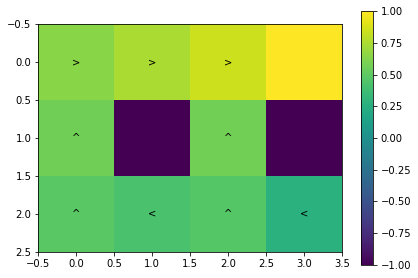

In [30]:
plotBestPolicy(v, 0.9)

Vous pouvez modifier la matrice de récompenses pour observer les différentes politiques optimales vues en cours. Peut-être en avons nous oublié?


## Policy Iteration

Implémentez l'algorithme d'itération sur les politiques. Pour débugger, vous pouvez dessiner la politique avec les fonctions ci-dessus (pour voir la fonction de valeur et/ou la politique associée).


`greedy_policy` will return `a_probs` which encode a policy that is greedy with respect to `v`. That is `a_probs[s][a]`  $= \pi(a|s)$.

In [31]:
def greedy_policy(env, discount, agent, v):
    
    # The new policy will be a_probs
    # We start by setting all probabilities to 0
    # Then when we have found the greedy action in a state, 
    # we change the probability for that action to 1.0.
    
    a_probs = np.zeros((env.n_states, env.n_actions))
    
    for s in range(env.n_states):
        
        action_values = np.zeros(env.n_actions)
        
        # Compute action value for all actions
        for a in range(env.n_actions):
            action_values[a] = compute_action_value(env, discount, s, a, v)
            
        a_max = np.argmax(action_values) # A greedy action
        a_probs[s][a_max] = 1.0 # Always choose the greedy action
        
    return a_probs

In [32]:
def policy_evaluation(env, discount, agent, v0, Niter=100, epsilon=1e-2):
    
    # Initial guess
    v_old = v0
    
    for _ in range(Niter):
        v_new = Bellman_RHS_all(env, discount, agent, v_old)
        
        if np.max(np.abs(v_new - v_old)) < epsilon:
            break
        
        v_old = v_new
        
    return v_new

In [33]:
def policy_iteration(env, discount, agent, Niter, epsilon=1e-2):
    
    # Initialisation
    v = np.zeros(env.n_states)
    
    for _ in range(Niter):
        v_old = v
        
        # Policy improvement (ie act greedy w.r.t v)
        agent.probs = greedy_policy(env, discount, agent, v)
        
        # Policy evaluation
        v = policy_evaluation(env, discount, agent, v)
        
        delta = np.max(np.abs(v_old - v))
        if delta < epsilon:
            break
    
    return v

In [34]:
#v_star, q_star, pi_star = policyIteration(0.9, T, R, epsilon=0.1)
v = policy_iteration(env, discount=0.9, agent=agent, Niter=100)

In [35]:
printV(v)

| 0.64 | 0.74 | 0.85 | 1.00 |
| 0.57 | ---- | 0.57 | -1.0 |
| 0.49 | 0.42 | 0.47 | 0.28 |


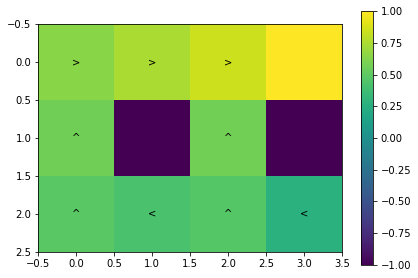

In [36]:
plotBestPolicy(v, 0.9)